# Data Analysis with Bootstrap-coupled ESTimation (DABEST)

<p> Data Analysis with Bootstrap-coupled ESTimation (DABEST) was developed by Ho <em>et al</em>. (2019) <em>Nature Methods</em> (<a target="_blank" href="https://www.biorxiv.org/content/10.1101/377978v2.full">https://www.biorxiv.org/content/10.1101/377978v2.full</a> see <a target="_blank" href="https://rdcu.be/bHhJ4">full-text here</a>).</p>

<p> DABEST creates an <em>estimation plot</em>, aka a "Gardner–Altman plot", which shows the distribution of mean differences (or effect sizes) between conditions. A "Gardner–Altman plot" presents all data points as a swarm plot and the mean difference(s), or effect size(s), as a bootstrap 95% confidence interval.</p>

<p> See the manual for using DABEST in Python at <a target="_blank" href="https://acclab.github.io/DABEST-python/">https://acclab.github.io/DABEST-python/</a>.</p>

<p> See the original Python code from Ho <em>et al</em>. (2019) on <a target="_blank" href="https://github.com/ACCLAB/DABEST-python">GitHub</a>.</p>

# Install packages

In [1]:
# Install packages that aren’t installed
import subprocess
import sys

# List of packages to check and install
packages_needed = ['numpy', 'pandas', 'scipy', 'matplotlib', 'seaborn', 'dabest']

# Function to check and install packages_needed
def install_missing_packages(packages_needed):
    for package in packages_needed:
        try:
            __import__(package)  # Try importing the package
        except ImportError:
            print(f"{package} was not installed but is now.")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        else:
            print(f"{package} is already installed.")
# Run the function
install_missing_packages(packages_needed)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest

numpy is already installed.
pandas is already installed.
scipy is already installed.
matplotlib is already installed.
seaborn is already installed.
dabest is already installed.


# DABEST using Github data

## Gardner-Altman estimation plot

/usr/local/lib/python3.11/dist-packages/dabest/_dabest_object.py:663: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  plot_data[self.__xvar].cat.remove_unused_categories(inplace=True)
/usr/local/lib/python3.11/dist-packages/dabest/_dabest_object.py:664: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  plot_data[self.__xvar].cat.reorder_categories(
/usr/local/lib/python3.11/dist-packages/dabest/plot_tools.py:1232: UserWarning: 4.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


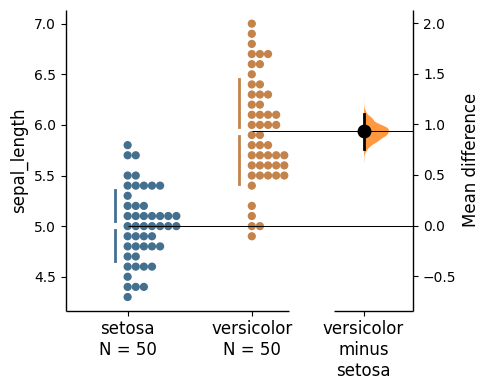

In [2]:
# use dabest package to create a estimation plot
# Load the iris dataset from the URL
iris_data = pd.read_csv('https://github.com/mwaskom/seaborn-data/raw/master/iris.csv')

# Convert the 'species' column to a categorical data type
iris_data['species'] = pd.Categorical(iris_data['species'])

# Create the estimation plot using dabest
# The inplace argument is no longer supported, so we will reassign the column
iris_data['species'] = iris_data['species'].cat.remove_unused_categories()
my_dabest_plot = dabest.load(iris_data, idx=("setosa", "versicolor"), x="species", y="sepal_length")
my_dabest_plot.mean_diff.plot();

## Cumming estimation plot

/usr/local/lib/python3.11/dist-packages/dabest/plot_tools.py:1232: UserWarning: 18.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/usr/local/lib/python3.11/dist-packages/dabest/plot_tools.py:1232: UserWarning: 10.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


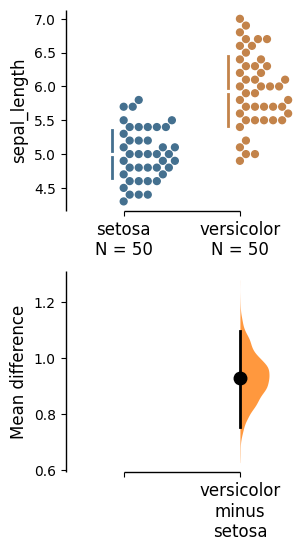

In [3]:
# Instead of a Gardner-Altman plot, you can generate a Cumming estimation plot by setting float_contrast=False in the plot() method.
my_dabest_plot.mean_diff.plot(float_contrast=False);

# DABEST using simulated data

## Simulate PAIRED data

In [4]:
# Simulate some data
np.random.seed(123)
n = 30
C = np.random.normal(loc=3.0, scale=0.5, size=n)  # Control group
T = np.random.normal(loc=3.3, scale=0.5, size=n)  # Test group

# Create an "id" column for paired observations. Remove if data are UNPAIRED.
ids = list(range(1, n+1))

df_simulate = pd.DataFrame({
    "id": ids * 2,  # each id appears twice, one for each group (Remove if data are UNPAIRED)
    "group": ["Control"]*n + ["Test"]*n,
    "value": np.concatenate([C, T])
})

#Examine the df
df_simulate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      60 non-null     int64  
 1   group   60 non-null     object 
 2   value   60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


In [5]:
df_simulate.describe()

,id,value
count,60.000000,60.000000
mean,15.500000,3.196550
std,8.728484,0.625109
min,1.000000,1.786660
25%,8.000000,2.703306
50%,15.500000,3.203138
75%,23.000000,3.669422
max,30.000000,4.496183


In [6]:
df_simulate.head()

,id,group,value
0,1,Control,2.457185
1,2,Control,3.498673
2,3,Control,3.141489
3,4,Control,2.246853
4,5,Control,2.710700


In [7]:
df_simulate.tail()

,id,group,value
55,26,Test,3.834658
56,27,Test,3.745353
57,28,Test,4.177443
58,29,Test,4.047822
59,30,Test,3.834696


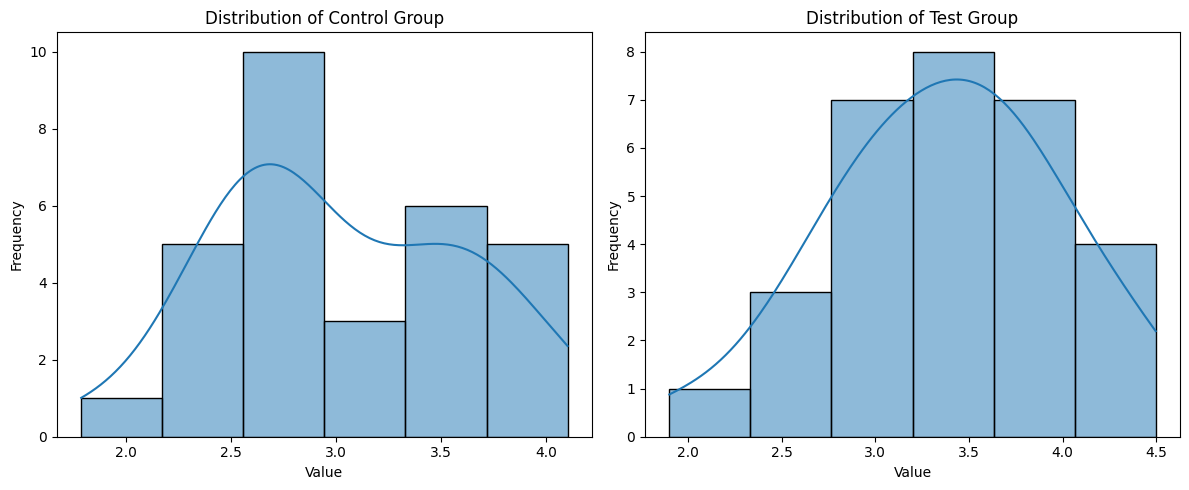

In [8]:
# Create histograms to visualize the distribution of data in each group
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_simulate[df_simulate['group'] == 'Control']['value'], kde=True)
plt.title('Distribution of Control Group')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_simulate[df_simulate['group'] == 'Test']['value'], kde=True)
plt.title('Distribution of Test Group')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Load the data into dabest

In [9]:
# Load the data into `dabest` with 5000 bootstrap samples. Use paired="baseline" to indicate that the data are paired and id_col='id' to help DABEST find the paired identiers
dabest_simulate = dabest.load(df_simulate, idx=("Control", "Test"), x="group",  y="value", paired="baseline", id_col='id', resamples=5000)

## Mean difference for PAIRED data

In [10]:
# calculate the mean difference (use median＿diff for the median difference)
dabest_simulate.mean_diff

DABEST v2024.03.29
                  
Good afternoon!
The current time is Fri Feb 21 13:10:12 2025.

The paired mean difference for repeated measures against baseline 
between Control and Test is 0.348 [95%CI 0.00975, 0.665].
The p-value of the two-sided permutation t-test is 0.0402, calculated for legacy purposes only. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [11]:
# calculate the mean difference with results of simulation
dabest_simulate.mean_diff.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,Control,Test,30,30,mean difference,baseline,0.348386,95,0.009749,0.66474,...,5000,12345,"[-0.28796204357590716, -0.28796204357590716, -...",0.0402,5000,"[0.025070246666521332, 0.025070246666521332, 0...",0.042652,134.0,0.044947,-2.095739


In [12]:
# calculate all statistical tests
dabest_simulate.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,Control,Test,30,30,mean difference,baseline,0.348386,95,0.009749,0.66474,0.0402,0.042652,134.0,0.044947,-2.095739


### Gardner-Altman estimation plot

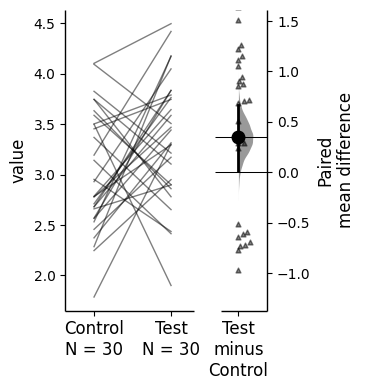

In [13]:
# build the estimation plot (Gardner-Altman plot) for the mean difference
dabest_simulate.mean_diff.plot();

### Cumming estimation plot

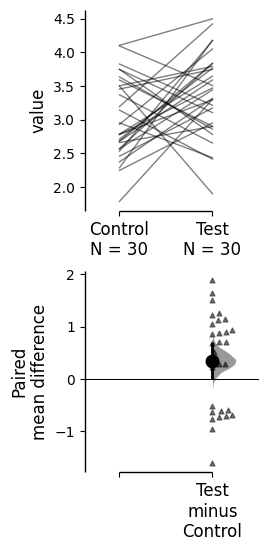

In [14]:
# Instead of a Gardner-Altman plot, you can generate a Cumming estimation plot by setting float_contrast=False in the plot() method.
dabest_simulate.mean_diff.plot(float_contrast=False);

## Cohen's d for PAIRED data

In [15]:
# calculate the effect size (use cohens＿d, hedges＿g, cohens＿h)
dabest_simulate.cohens_d.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,Control,Test,30,30,Cohen's d,baseline,0.575777,95,-0.00695,1.186544,...,5000,12345,"[-0.469580781130797, -0.469580781130797, -0.13...",0.0402,5000,"[0.025070246666521332, 0.025070246666521332, 0...",0.042652,134.0,0.044947,-2.095739


### Gardner-Altman estimation plot

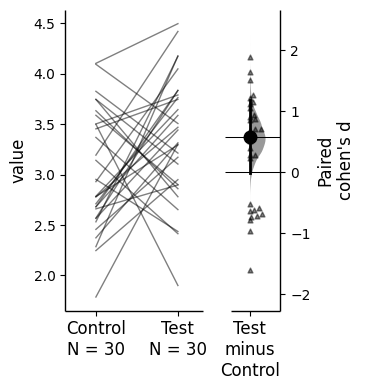

In [16]:
# build the estimation plot (Gardner-Altman plot) for Cohen's D
dabest_simulate.cohens_d.plot();

### Cumming estimation plot

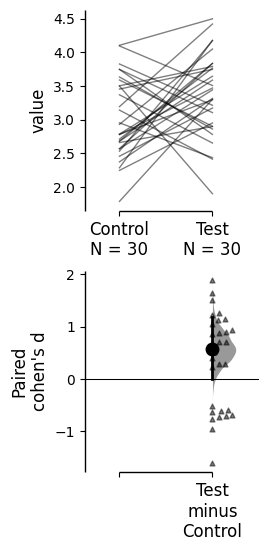

In [17]:
# Instead of a Gardner-Altman plot, you can generate a Cumming estimation plot by setting float_contrast=False in the plot() method.
dabest_simulate.cohens_d.plot(float_contrast=False);